In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer

In [13]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

df_centers = pd.DataFrame({
    'x1': c[:, 0],
    'x2': c[:, 1]
})

In [14]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame({
    'x1': X_m[:, 0],
    'x2': X_m[:, 1]
})

## VISUALIZACION

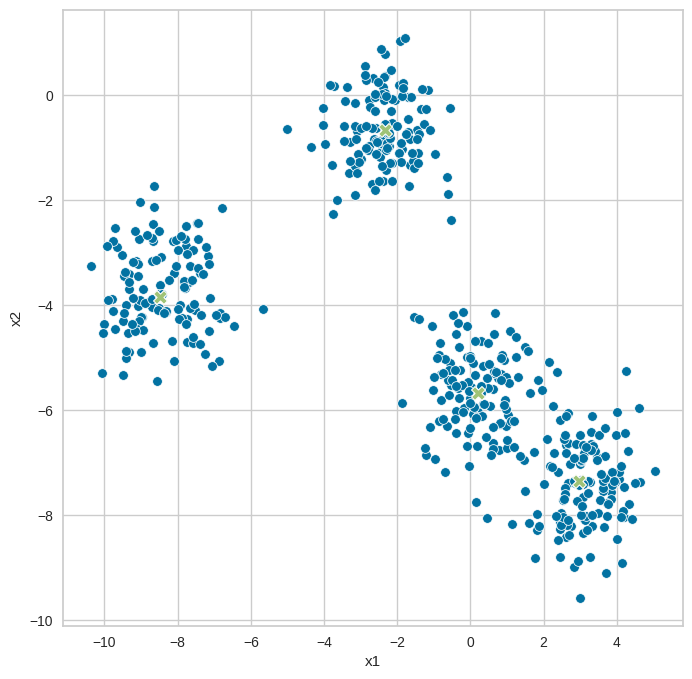

In [15]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.plot()
plt.show()

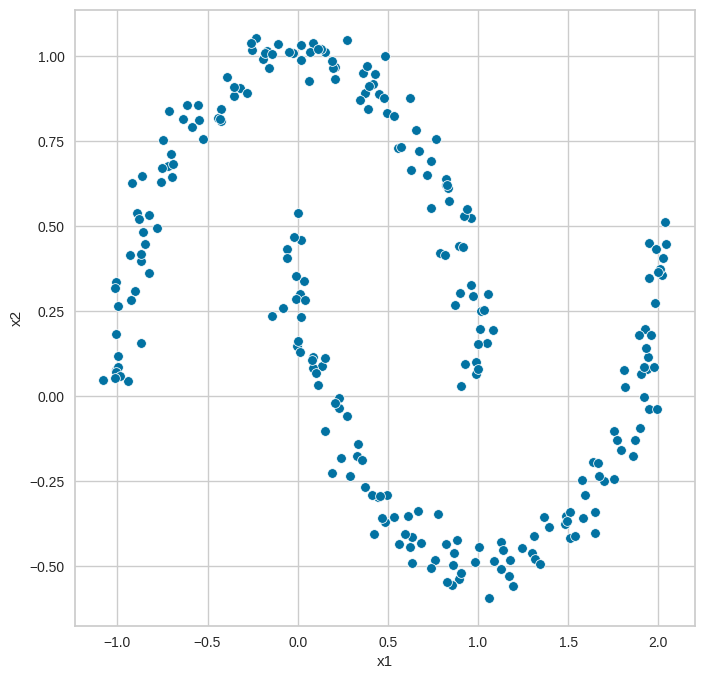

In [16]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.plot()
plt.show()

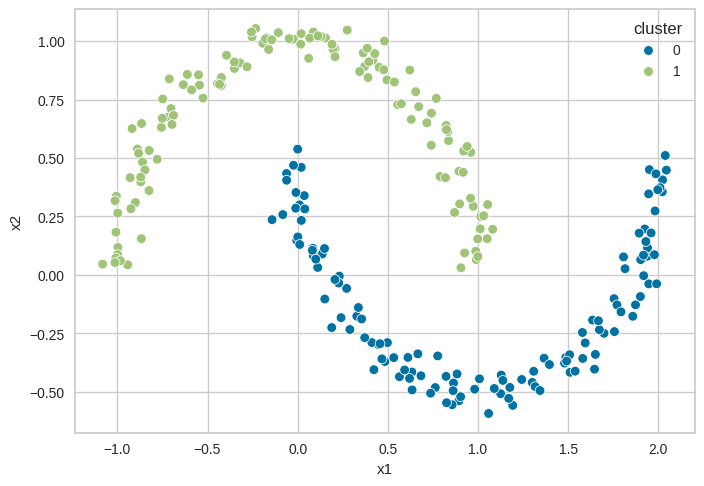

In [17]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

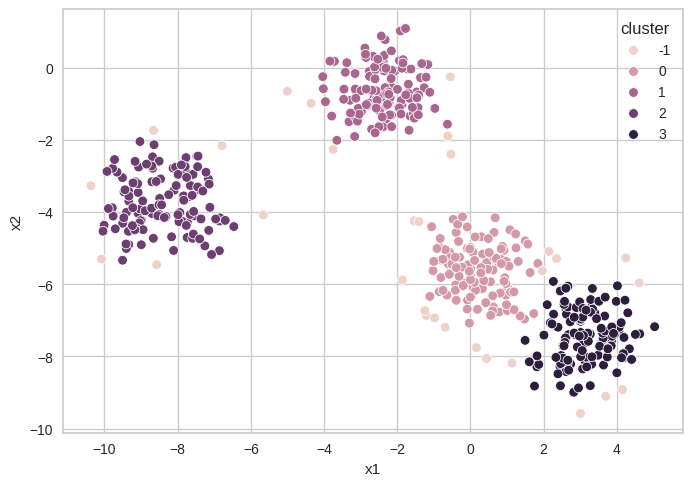

In [48]:
dbscan = DBSCAN(eps=0.65, min_samples=9)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

## HIPERPARAMETROS

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

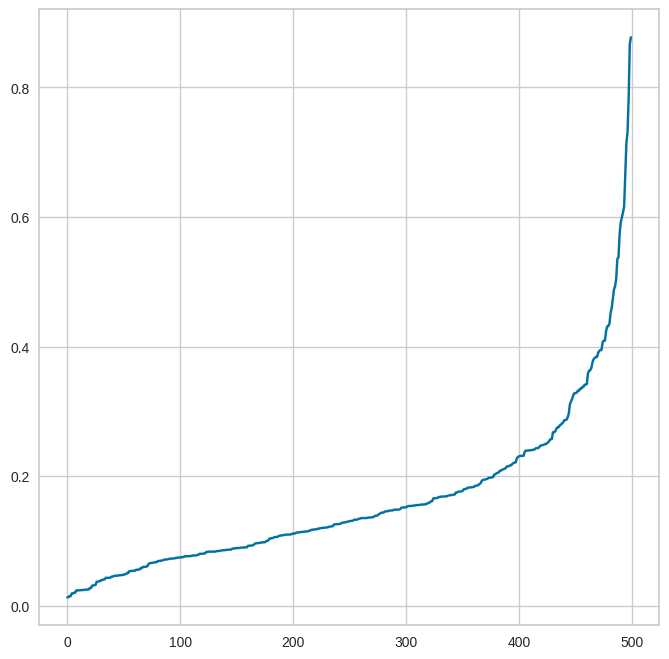

In [29]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(8, 8))
plt.plot(distances)

In [30]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)

In [35]:
from itertools import product

product = list(product(eps_values, min_samples))

In [37]:
dbscan_params = list(product)
sil_scores = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

In [43]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['eps', 'min_samples'])
df_params_tunning['sil_score'] = sil_scores

pivot_data = pd.pivot_table(df_params_tunning, values='sil_score', index='min_samples', columns='eps')

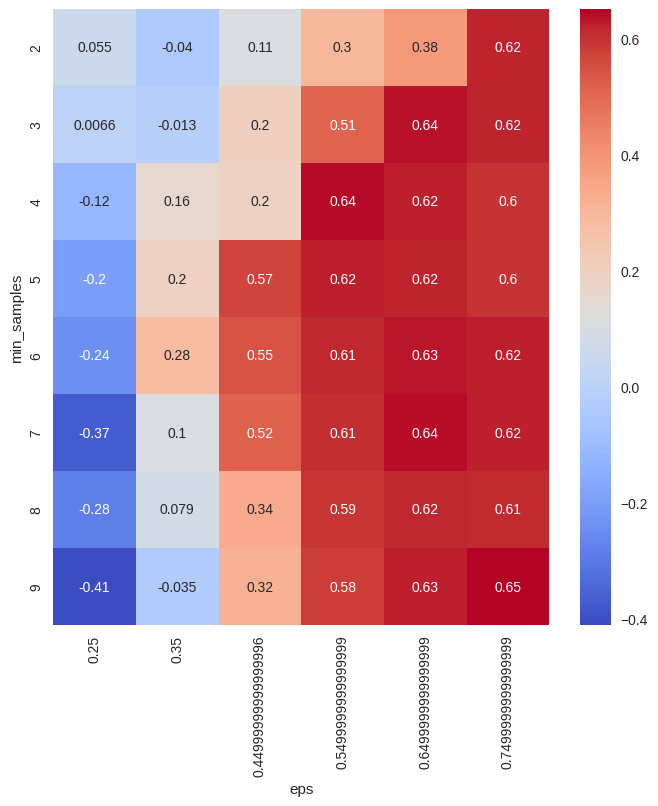

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(pivot_data, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.show()